In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Spliting preprocessing the dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
# Machine Learing classifiers Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# For Testing and Evaluating
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [13]:
data = pd.read_csv("english_toxic_comment_1000.csv")

In [14]:
data.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


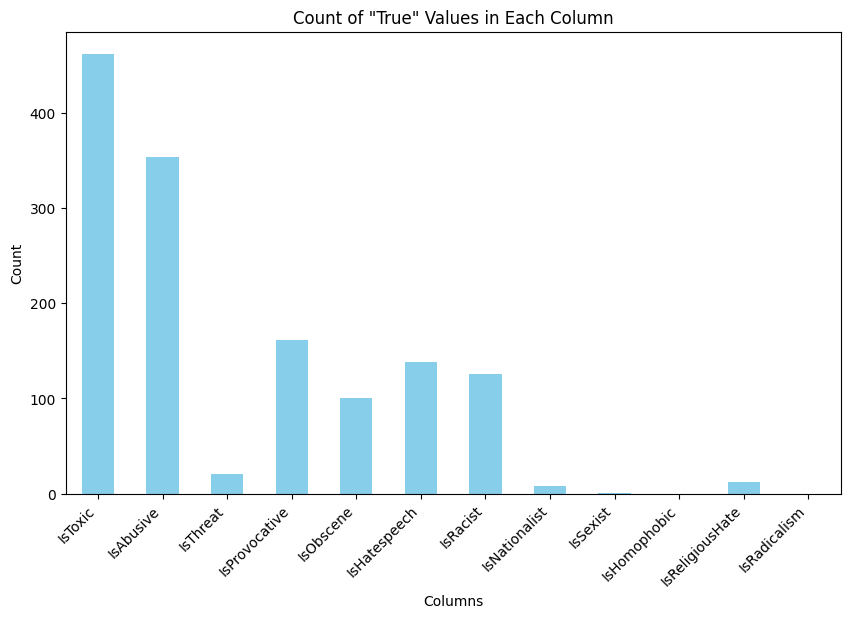

In [15]:
boolean_columns = data.select_dtypes(include='bool')
true_counts = boolean_columns.sum()

plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue')
plt.title('Count of "True" Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [17]:
response = data.drop(['CommentId', 'VideoId', 'IsRadicalism', 'IsHomophobic', 'IsSexist', 'IsReligiousHate'], axis=1)

boolean_columns = response.select_dtypes(include='bool').columns

# Convert boolean columns to integers
response[boolean_columns] = response[boolean_columns].astype(int)

response.info()
# counts = response['Text'].value_counts()
# counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           1000 non-null   object
 1   IsToxic        1000 non-null   int64 
 2   IsAbusive      1000 non-null   int64 
 3   IsThreat       1000 non-null   int64 
 4   IsProvocative  1000 non-null   int64 
 5   IsObscene      1000 non-null   int64 
 6   IsHatespeech   1000 non-null   int64 
 7   IsRacist       1000 non-null   int64 
 8   IsNationalist  1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [18]:
new_data = response["Text"]
target = response["IsToxic"]

comments_train, comments_test, y_train, y_test = train_test_split(
    new_data, target, test_size=0.30, stratify=target, random_state=42
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000, min_df=8, max_df=0.8)
vectorizer.fit(comments_train)
x_train = vectorizer.transform(comments_train)
x_test = vectorizer.transform(comments_test)

print(x_train)

  (0, 371)	0.133941151629226
  (0, 347)	0.13209343901890505
  (0, 339)	0.07555048795579923
  (0, 331)	0.1530837803204175
  (0, 321)	0.13090841980579648
  (0, 320)	0.3096538810037894
  (0, 317)	0.1694564603850559
  (0, 251)	0.1185091302915212
  (0, 246)	0.2058775153566081
  (0, 230)	0.08336577125481749
  (0, 227)	0.2182188557105718
  (0, 197)	0.2052858482702393
  (0, 163)	0.175899554940149
  (0, 161)	0.10747309532283061
  (0, 110)	0.1694564603850559
  (0, 69)	0.18018766594305896
  (0, 64)	0.19815659381970072
  (0, 21)	0.40396072095478336
  (0, 16)	0.07670064856051359
  (0, 14)	0.38425779013691064
  (0, 8)	0.11116793688649203
  (0, 4)	0.4105716965404786
  (1, 353)	0.5191864943825091
  (1, 326)	0.28941351152159567
  (1, 323)	0.3990913563739194
  :	:
  (697, 21)	0.10211151544898771
  (697, 16)	0.23265686154602908
  (697, 12)	0.19719217375461168
  (698, 381)	0.1775161248452627
  (698, 377)	0.271828476475054
  (698, 374)	0.2803566063412973
  (698, 361)	0.4630797863528085
  (698, 330)	0.13023

In [19]:
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

# Apply oversampling to handle class imbalance
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_array, y_train)

# Initialize classifiers with tuned hyperparameters
classifiers = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    SVC(C=1.0, kernel='linear', gamma='scale'),
    LogisticRegression(solver='liblinear', max_iter=1000),
    KNeighborsClassifier(n_neighbors=7),
]

# Train and evaluate classifiers on resampled data
for classifier in classifiers:
    cross_arr = cross_val_score(classifier, x_train_resampled, y_train_resampled, cv=4, scoring="accuracy")
    print(f"{classifier.__class__.__name__} accuracies of cross-validation: {cross_arr} -----> mean of accuracies : {np.mean(cross_arr)}")

    # Evaluate on test data
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test_array)
    print(f"{classifier.__class__.__name__} classification report:\n{classification_report(y_test, y_pred)}")

RandomForestClassifier accuracies of cross-validation: [0.61375661 0.67724868 0.71276596 0.77659574] -----> mean of accuracies : 0.6950917482832376
RandomForestClassifier classification report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       161
           1       0.75      0.59      0.66       139

    accuracy                           0.72       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.72      0.71       300

SVC accuracies of cross-validation: [0.65608466 0.65608466 0.7287234  0.71808511] -----> mean of accuracies : 0.6897444557019025
SVC classification report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       161
           1       0.72      0.60      0.66       139

    accuracy                           0.71       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.71      0.71      0.70       3

In [20]:
# Function for classifying the comment
classifiers_name = ["RandomForestClassifier", "SVC", "LogisticRegression", "KNeighborsClassifier"]

def classify_string(string):
    for clf, clf_name in zip(classifiers, classifiers_name):
        clf.fit(x_train_resampled, y_train_resampled)
        prediction = clf.predict(vectorizer.transform([string]).toarray())[0]

        if prediction == 0:
            print(clf_name, " : NOT TOXIC : ", string)
        else:
            print(clf_name, " : TOXIC : ", string)

In [21]:
classify_string("STAND AND FIGHT OR SIT AND DIE")

RandomForestClassifier  : NOT TOXIC :  STAND AND FIGHT OR SIT AND DIE
SVC  : NOT TOXIC :  STAND AND FIGHT OR SIT AND DIE
LogisticRegression  : NOT TOXIC :  STAND AND FIGHT OR SIT AND DIE
KNeighborsClassifier  : TOXIC :  STAND AND FIGHT OR SIT AND DIE


In [22]:
classify_string("i have a friend, and he is black")

RandomForestClassifier  : TOXIC :  i have a friend, and he is black
SVC  : TOXIC :  i have a friend, and he is black
LogisticRegression  : TOXIC :  i have a friend, and he is black
KNeighborsClassifier  : NOT TOXIC :  i have a friend, and he is black


In [23]:
classify_string("Black color is my favorite")

RandomForestClassifier  : NOT TOXIC :  Black color is my favorite
SVC  : NOT TOXIC :  Black color is my favorite
LogisticRegression  : NOT TOXIC :  Black color is my favorite
KNeighborsClassifier  : NOT TOXIC :  Black color is my favorite


In [24]:
classify_string("Toxicity is poison, and I'm the antidote.")

RandomForestClassifier  : TOXIC :  Toxicity is poison, and I'm the antidote.
SVC  : TOXIC :  Toxicity is poison, and I'm the antidote.
LogisticRegression  : TOXIC :  Toxicity is poison, and I'm the antidote.
KNeighborsClassifier  : TOXIC :  Toxicity is poison, and I'm the antidote.


In [25]:
classify_string("it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to rape our heritage and destroy the qualities that make us White People great")

RandomForestClassifier  : TOXIC :  it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to rape our heritage and destroy the qualities that make us White People great
SVC  : TOXIC :  it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to rape our heritage and destroy the qualities that make us White People great
LogisticRegression  : TOXIC :  it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to rape our heritage and destroy the qualities that make us White People great
KNeighborsClassifier  : NOT TOXIC :  it is a world run by the Zionist Jewish Influence and Race Tainting Paedophiles that are only here to rape our heritage and destroy the qualities that make us White People great
